# Information

## The University of Polytechnic of Timisoara
### Year 1, Semester 2, Machine Learning
### Sulaibi Ahmad  

## Machine Learning for Stroke Prediction: A Case Study with Kaggle Data
### By fedesoriano, link Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
### Context:
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.  
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each ro  in the data provides relavant information about the patient  
### Information:
1. **Demographics** (age, gender)
2. **Medical history** (hypertension, heart disease)
3. **Lifestyle habits** (smoking status)
4. **Blood test results** (average glucose level, body mass index)
5. **Stroke diagnosis** (yes/no)
### Attribute Information:
1. **id**: Unique identifier.
2. **gender**: "Male", "Female" or "Other".
3. **age**: Age of the patient.
4. **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
5. **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.
6. **ever_married**: "No" or "Yes".
7. **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed".
8. **Residence_type**: "Rural" or "Urban".
9. **avg_glucose_level**: Average glucose level in blood.
10. **bmi**: Body mass index.
11. **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*.
12. **stroke**: 1 if the patient had a stroke or 0 if not.
#### *Note: "Unknown" in smoking_status means that the information is unavailable for this patient.

# Importing libraries to visualize data and diagrams.

In [247]:
import pandas as pd
import seaborn as se
import matplotlib.pyplot as mpl
import os

# Data Acquisition and Data Preprocessing

In [248]:
# Fetching the data from CSV file
pd_fetch = os.path.join("Data", "stroke_data.csv")
pf_fetch_data = pd.read_csv(pd_fetch)

# Displaying the data in the Table
pd_data = pd.DataFrame(pf_fetch_data)
pd_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [249]:
# check if Null/NaN values exist
pd_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [250]:
# Filling data from the next rows for every NaN values
pd_format = pd_data.bfill(axis=0)
pd_format

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,32.5,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,40.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [251]:
# The ID is used to provide unique id for each patient. In this case we are not in need.
pd_format_2 = pd_format.drop('id', axis=1)

In [252]:
print("Before: ",pd_format_2.get('gender').unique())

# Drop the Unknown patient by setting gender as index.
pd_format_2.set_index('gender', inplace=True)
pd_format_2 = pd_format_2.drop(index='Other')
# Retreive the gender column after dropping 'Other'.
pd_format_2.reset_index(inplace=True)

print("After: ",pd_format_2.get('gender').unique())

Before:  ['Male' 'Female' 'Other']
After:  ['Male' 'Female']


In [253]:
pd_format_2.describe(include=['int64', 'float64'])

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.931141,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.858566,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.600000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [254]:
# Select the columns containing strings.
categorical_df = pd_format_2.select_dtypes(include='object')
categorical_df

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5104,Female,Yes,Private,Urban,never smoked
5105,Female,Yes,Self-employed,Urban,never smoked
5106,Female,Yes,Self-employed,Rural,never smoked
5107,Male,Yes,Private,Rural,formerly smoked


In [255]:
# Show how many unique names exist and their most frequent ones.
summary_stats = categorical_df.describe()
summary_stats

,gender,ever_married,work_type,Residence_type,smoking_status
count,5109,5109,5109,5109,5109
unique,2,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2924,2596,1892


In [256]:
# Class distribution for work_type based on the gender
pd.DataFrame(pd_format_2[['work_type','gender']].value_counts())

count
work_type     gender       
Private       Female   1754
              Male     1170
Self-employed Female    504
Govt_job      Female    399
children      Male      361
              Female    326
Self-employed Male      315
Govt_job      Male      258
Never_worked  Female     11
              Male       11

In [257]:
# Selecting columns that contain data-types of float and int, and excluding non-numeric columns (e.g. Gender).
numeric_data = pd_format_2.select_dtypes(include=['float64', 'int64'])
numeric_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,32.5,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5104,80.0,1,0,83.75,40.0,0
5105,81.0,0,0,125.20,40.0,0
5106,35.0,0,0,82.99,30.6,0
5107,51.0,0,0,166.29,25.6,0


In [258]:
# Obtian the correlation between each column
correlation = numeric_data.corr()
correlation

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.318739,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.146766,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.042632,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.167924,0.131991
bmi,0.318739,0.146766,0.042632,0.167924,1.000000,0.049935
stroke,0.245239,0.127891,0.134905,0.131991,0.049935,1.000000


# Data Visualization

## HeatMap

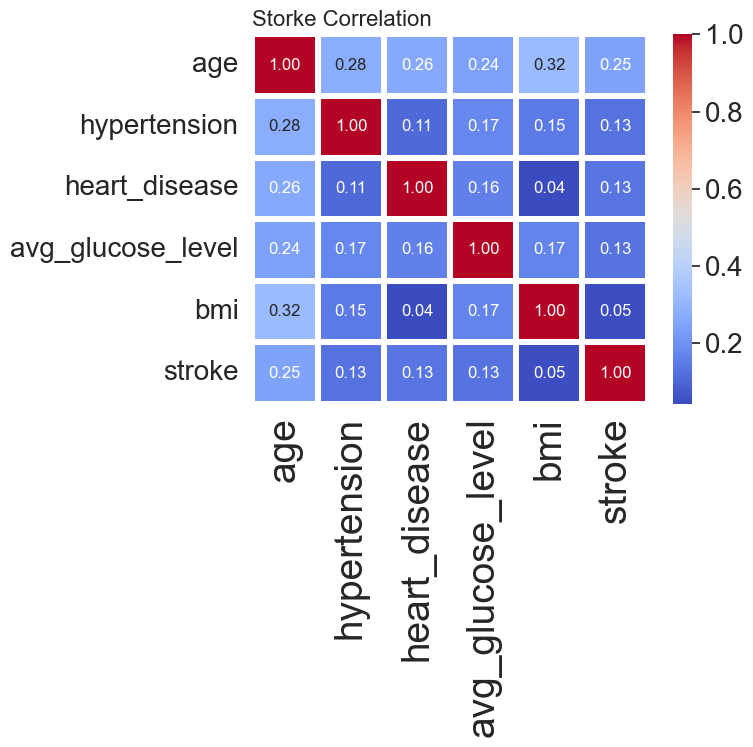

In [259]:
# Visualizing the correletated columns in a heatmap
# Nearer to 1: Columns that will likely be used
# Nearer to 0: Columns that will not be used
heat = se.heatmap(correlation,
           cmap='coolwarm',
           annot=True,
           linecolor='white',
           linewidth=3,
           fmt='.2f')
mpl.title("Storke Correlation", loc = 'left', size=16)
mpl.show()
# heat.figure.savefig(os.path.join(folder_path, "HeatMap_overall.png"))

## Pie Chart

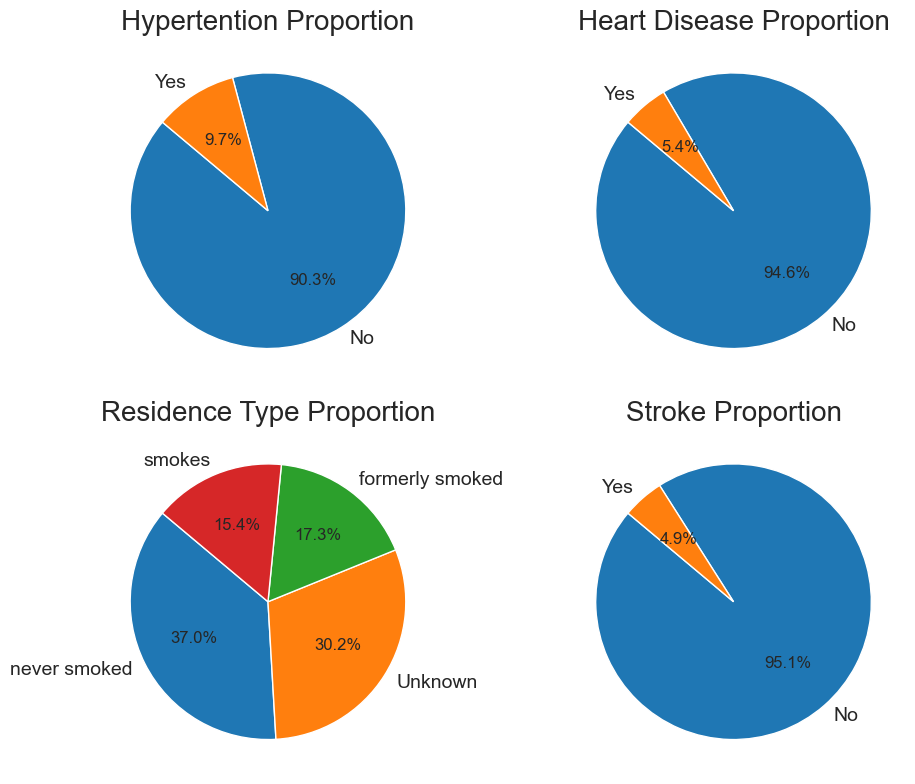

In [260]:
hypertension_counts = pd_format_2['hypertension'].value_counts()
heart_disease_counts = pd_format_2['heart_disease'].value_counts()
residence_counts = pd_format_2['smoking_status'].value_counts()
stroke_counts = pd_format_2['stroke'].value_counts()

# Create subplots for pie charts
fig, axes = mpl.subplots(2, 2, figsize=(10, 8))  # Adjust figure size as needed

# Create pie charts with desired font size adjustments
def create_pie_chart(ax, counts, title, label_fontsize=14, title_fontsize=20):

  # print(counts.unqiue)
  if counts.index.tolist() == [0, 1]:
    # print("yes")
    pie_wedge, texts, autotexts = ax.pie(counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=140)
  else:
    pie_wedge, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)

  # Set font size for slice labels (inside the pie)
  for text in texts:
    text.set_fontsize(label_fontsize)

  # # Create legend with consistent font size
  # leg = ax.legend(pie_wedge, counts.index, loc="best")
  # for text in leg.get_texts():
  #   text.set_fontsize(label_fontsize)

  # Set font size for pie chart title (outside the pie)
  ax.set_title(title, fontsize=title_fontsize)

# Generate pie charts using the function
create_pie_chart(axes[0, 0], hypertension_counts, 'Hypertention Proportion')
create_pie_chart(axes[0, 1], heart_disease_counts, 'Heart Disease Proportion')
create_pie_chart(axes[1, 0], residence_counts, 'Residence Type Proportion')
create_pie_chart(axes[1, 1], stroke_counts, 'Stroke Proportion')

# Adjust layout to prevent overlap
mpl.tight_layout()

# Show the plots
mpl.show()

# fig.savefig(os.path.join(folder_path, "Pie.png"))

## Bar plot

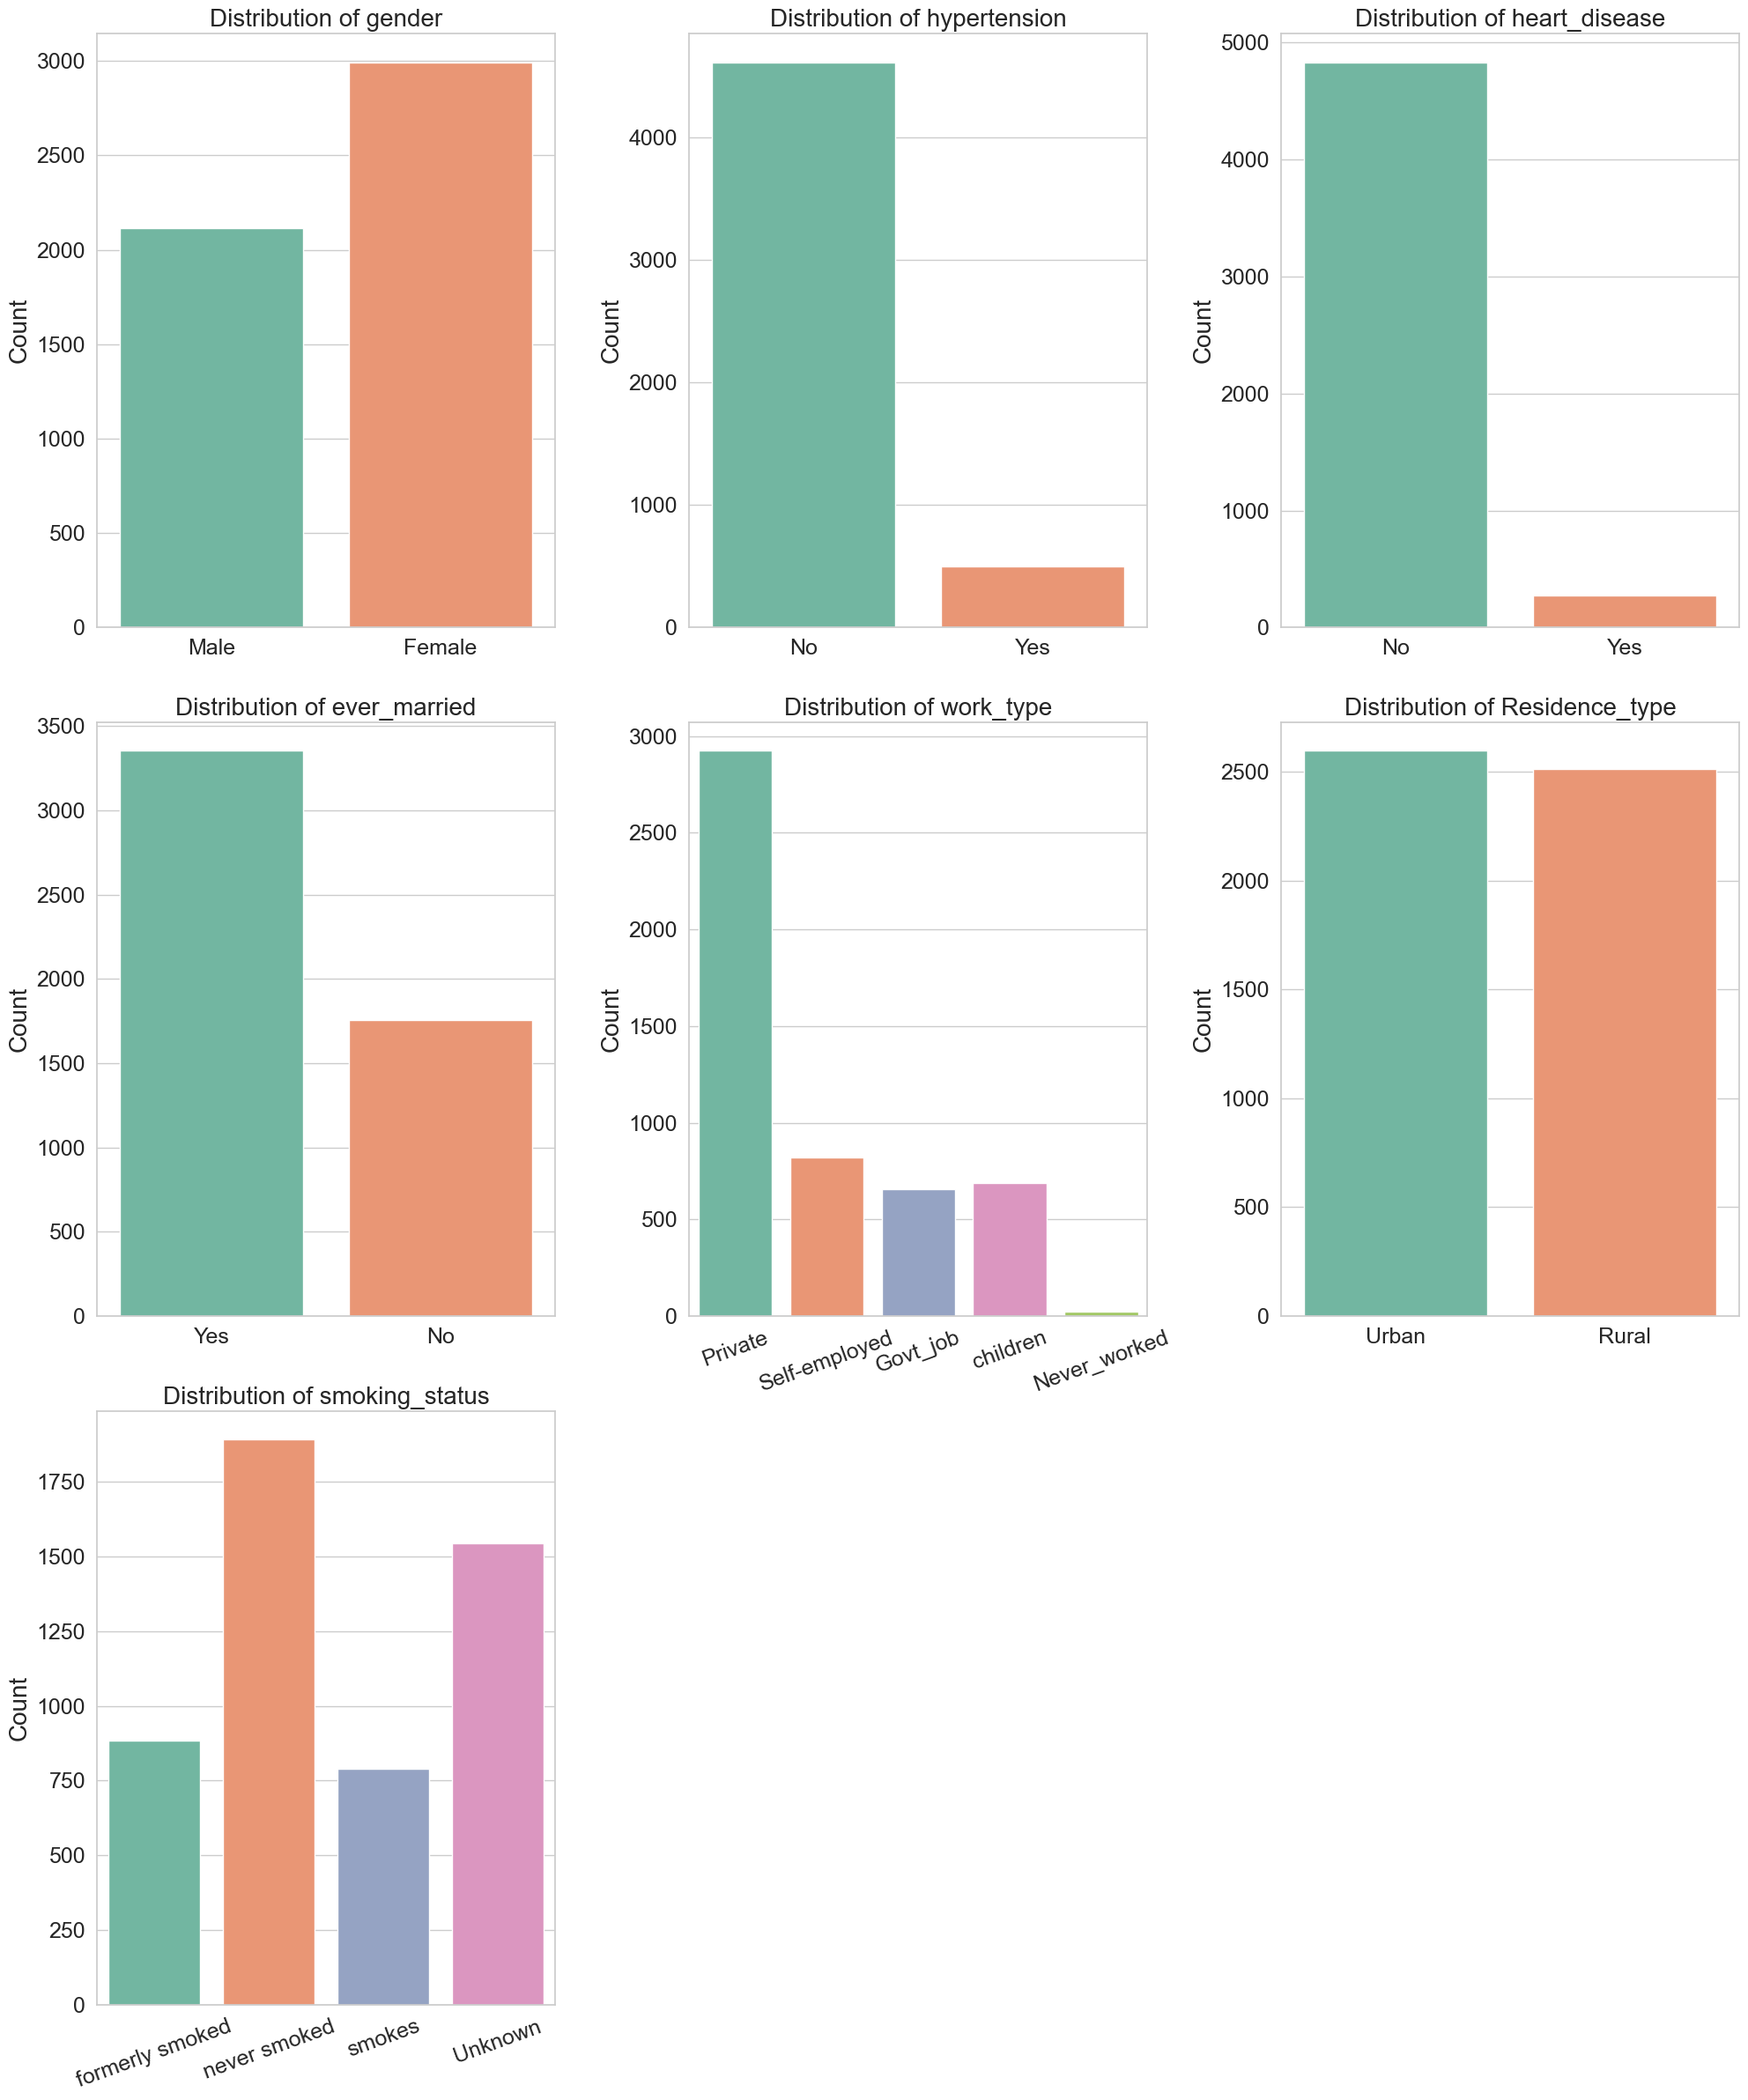

In [261]:
features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

fig, axes = mpl.subplots(3, 3, figsize=(20, 24))

axes = axes.flatten()

for i, feature in enumerate(features):

    if feature in ['hypertension', 'heart_disease']:
        countplot = se.countplot(x=feature, data=pd_format_2, ax=axes[i], palette="Set2", hue = feature, legend=False)
        countplot.set(xticks=([0, 1]))
        countplot.set(xticklabels = (['No', 'Yes']))
    else:
        countplot = se.countplot(x=feature, data=pd_format_2, ax=axes[i], palette="Set2", hue = feature, legend=False)

    if feature in ['work_type', 'smoking_status']:
        countplot.set_xticks(range(len(pd_format_2[feature].unique())))
        countplot.set_xticklabels(axes[i].get_xticklabels(), rotation=20)

    countplot.set_title(f"Distribution of {feature}", fontsize=20)
    countplot.set_xlabel(None)
    countplot.set_ylabel("Count", fontsize=20)
    countplot.tick_params(axis='both', which='major', labelsize=18)


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

mpl.tight_layout()
mpl.show()

# fig.savefig(os.path.join(folder_path, "Bar_distribution.png"))

## Violin

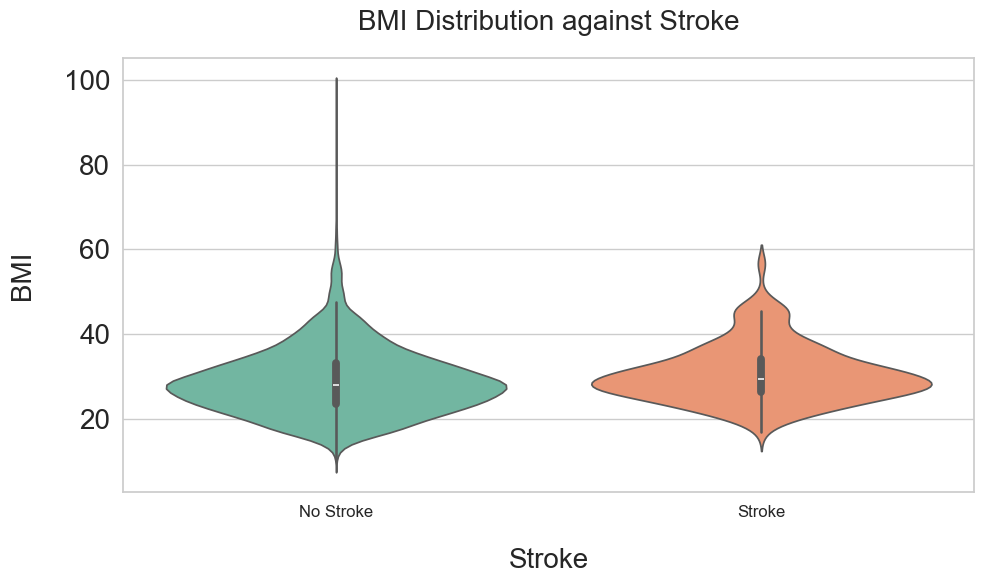

In [262]:
fig, ax = mpl.subplots(figsize=(10, 6))

se.violinplot(x='stroke', y='bmi', data=pd_format_2, palette="Set2", ax=ax, hue='stroke', legend=False)

# Set titles and labels
ax.set_title('BMI Distribution against Stroke', fontsize=20, pad=20)
ax.set_xlabel('Stroke', fontsize=20, labelpad=20)
ax.set_ylabel('BMI', fontsize=20, labelpad=20)
ax.set_xticks(range(len(pd_format_2['stroke'].unique())))
ax.set_xticklabels(['No Stroke', 'Stroke'], fontsize=12)

mpl.tight_layout()
mpl.show()
# fig.savefig(os.path.join(folder_path, "Violin.png"))

## Data against Gender

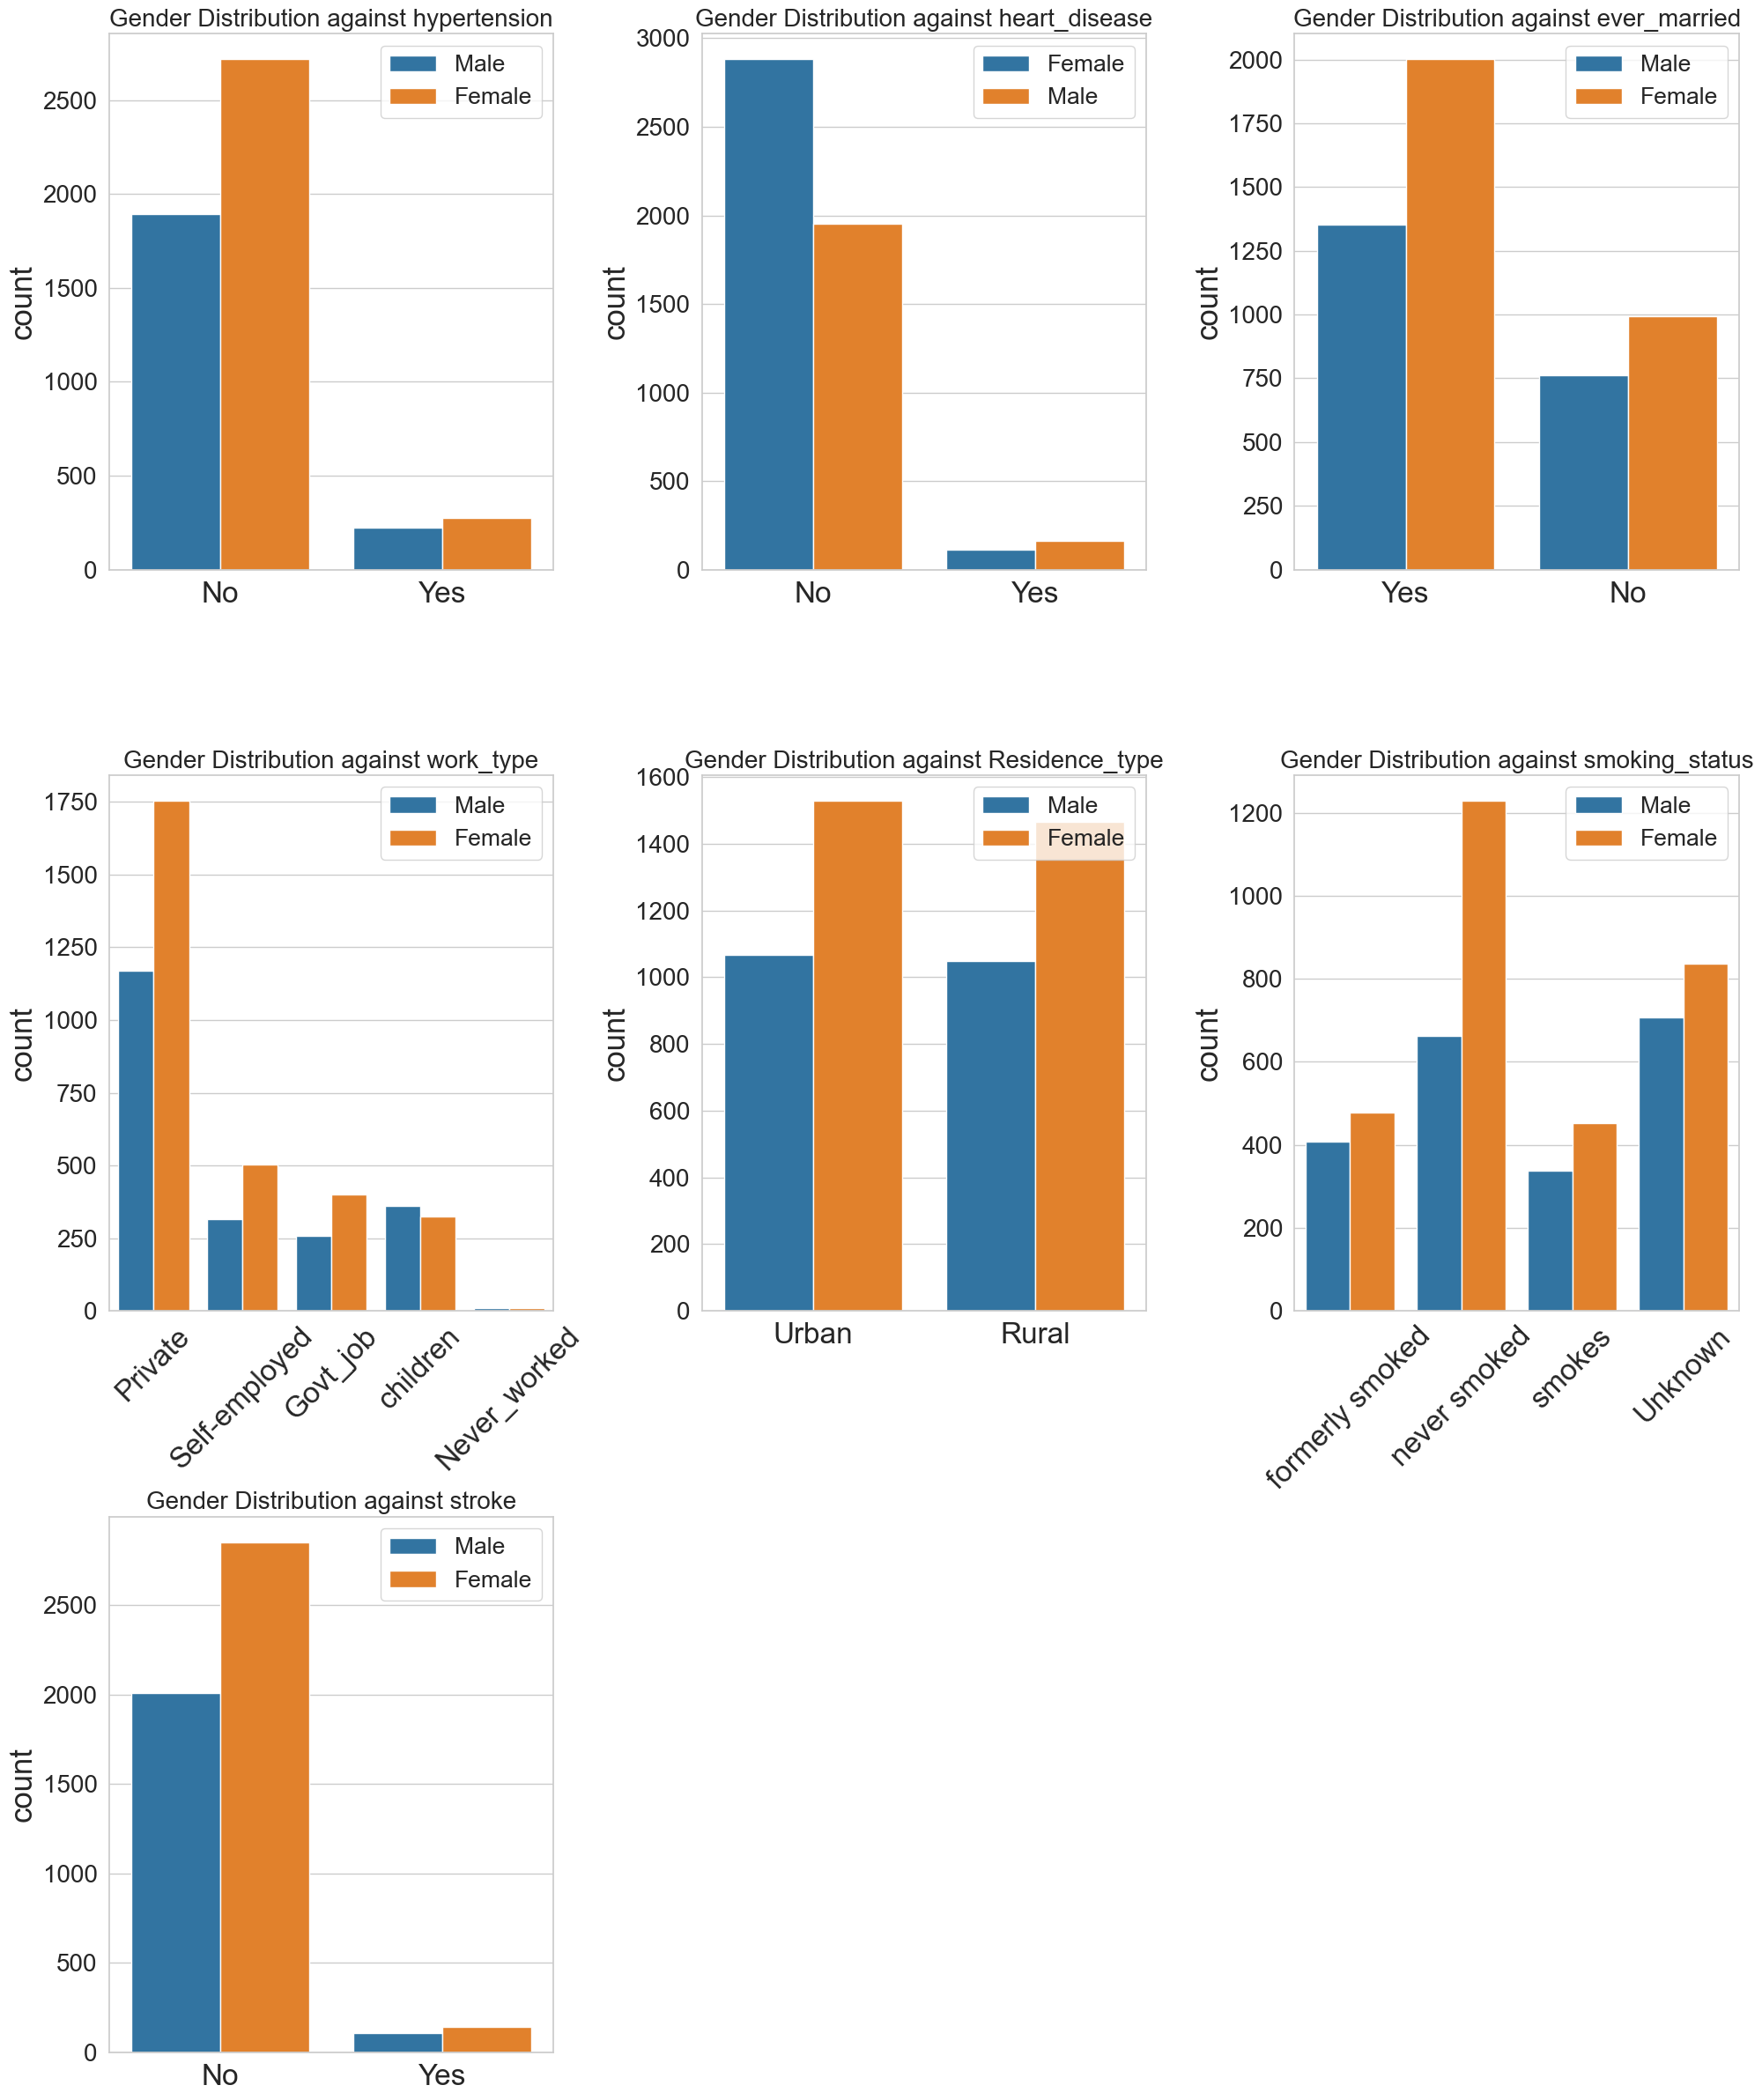

In [263]:
columns = pd_format_2.drop(['age', 'avg_glucose_level', 'bmi', 'gender'], axis=1).columns

mpl.figure(figsize=(20,24))
se.set_context(rc={'xtick.labelsize': 24, 'ytick.labelsize': 20})

for i in range(len(columns)):
    mpl.subplot(3,3,i+1)
    mpl.tight_layout()

    if columns[i] in ['hypertension', 'heart_disease', 'stroke']:
        count_plot = se.countplot(pd_format_2, x=pd_format_2[columns[i]], hue='gender')
        count_plot.set(xticks=([0, 1]))
        count_plot.set(xticklabels = (['No', 'Yes']))
    else:
        count_plot = se.countplot(pd_format_2, x=pd_format_2[columns[i]], hue='gender')

    if columns[i] in ['work_type', 'smoking_status']:
        mpl.xticks(rotation=45)

    count_plot.set_title(f'Gender Distribution against {columns[i]}', fontsize=20)
    count_plot.set_xlabel(None)
    count_plot.set_ylabel("count", fontsize=25)
    count_plot.legend(fontsize=19)

mpl.tight_layout()
mpl.show()

# mpl.savefig(os.path.join(folder_path, "Gender_against_data.png"))

## Data against Stroke

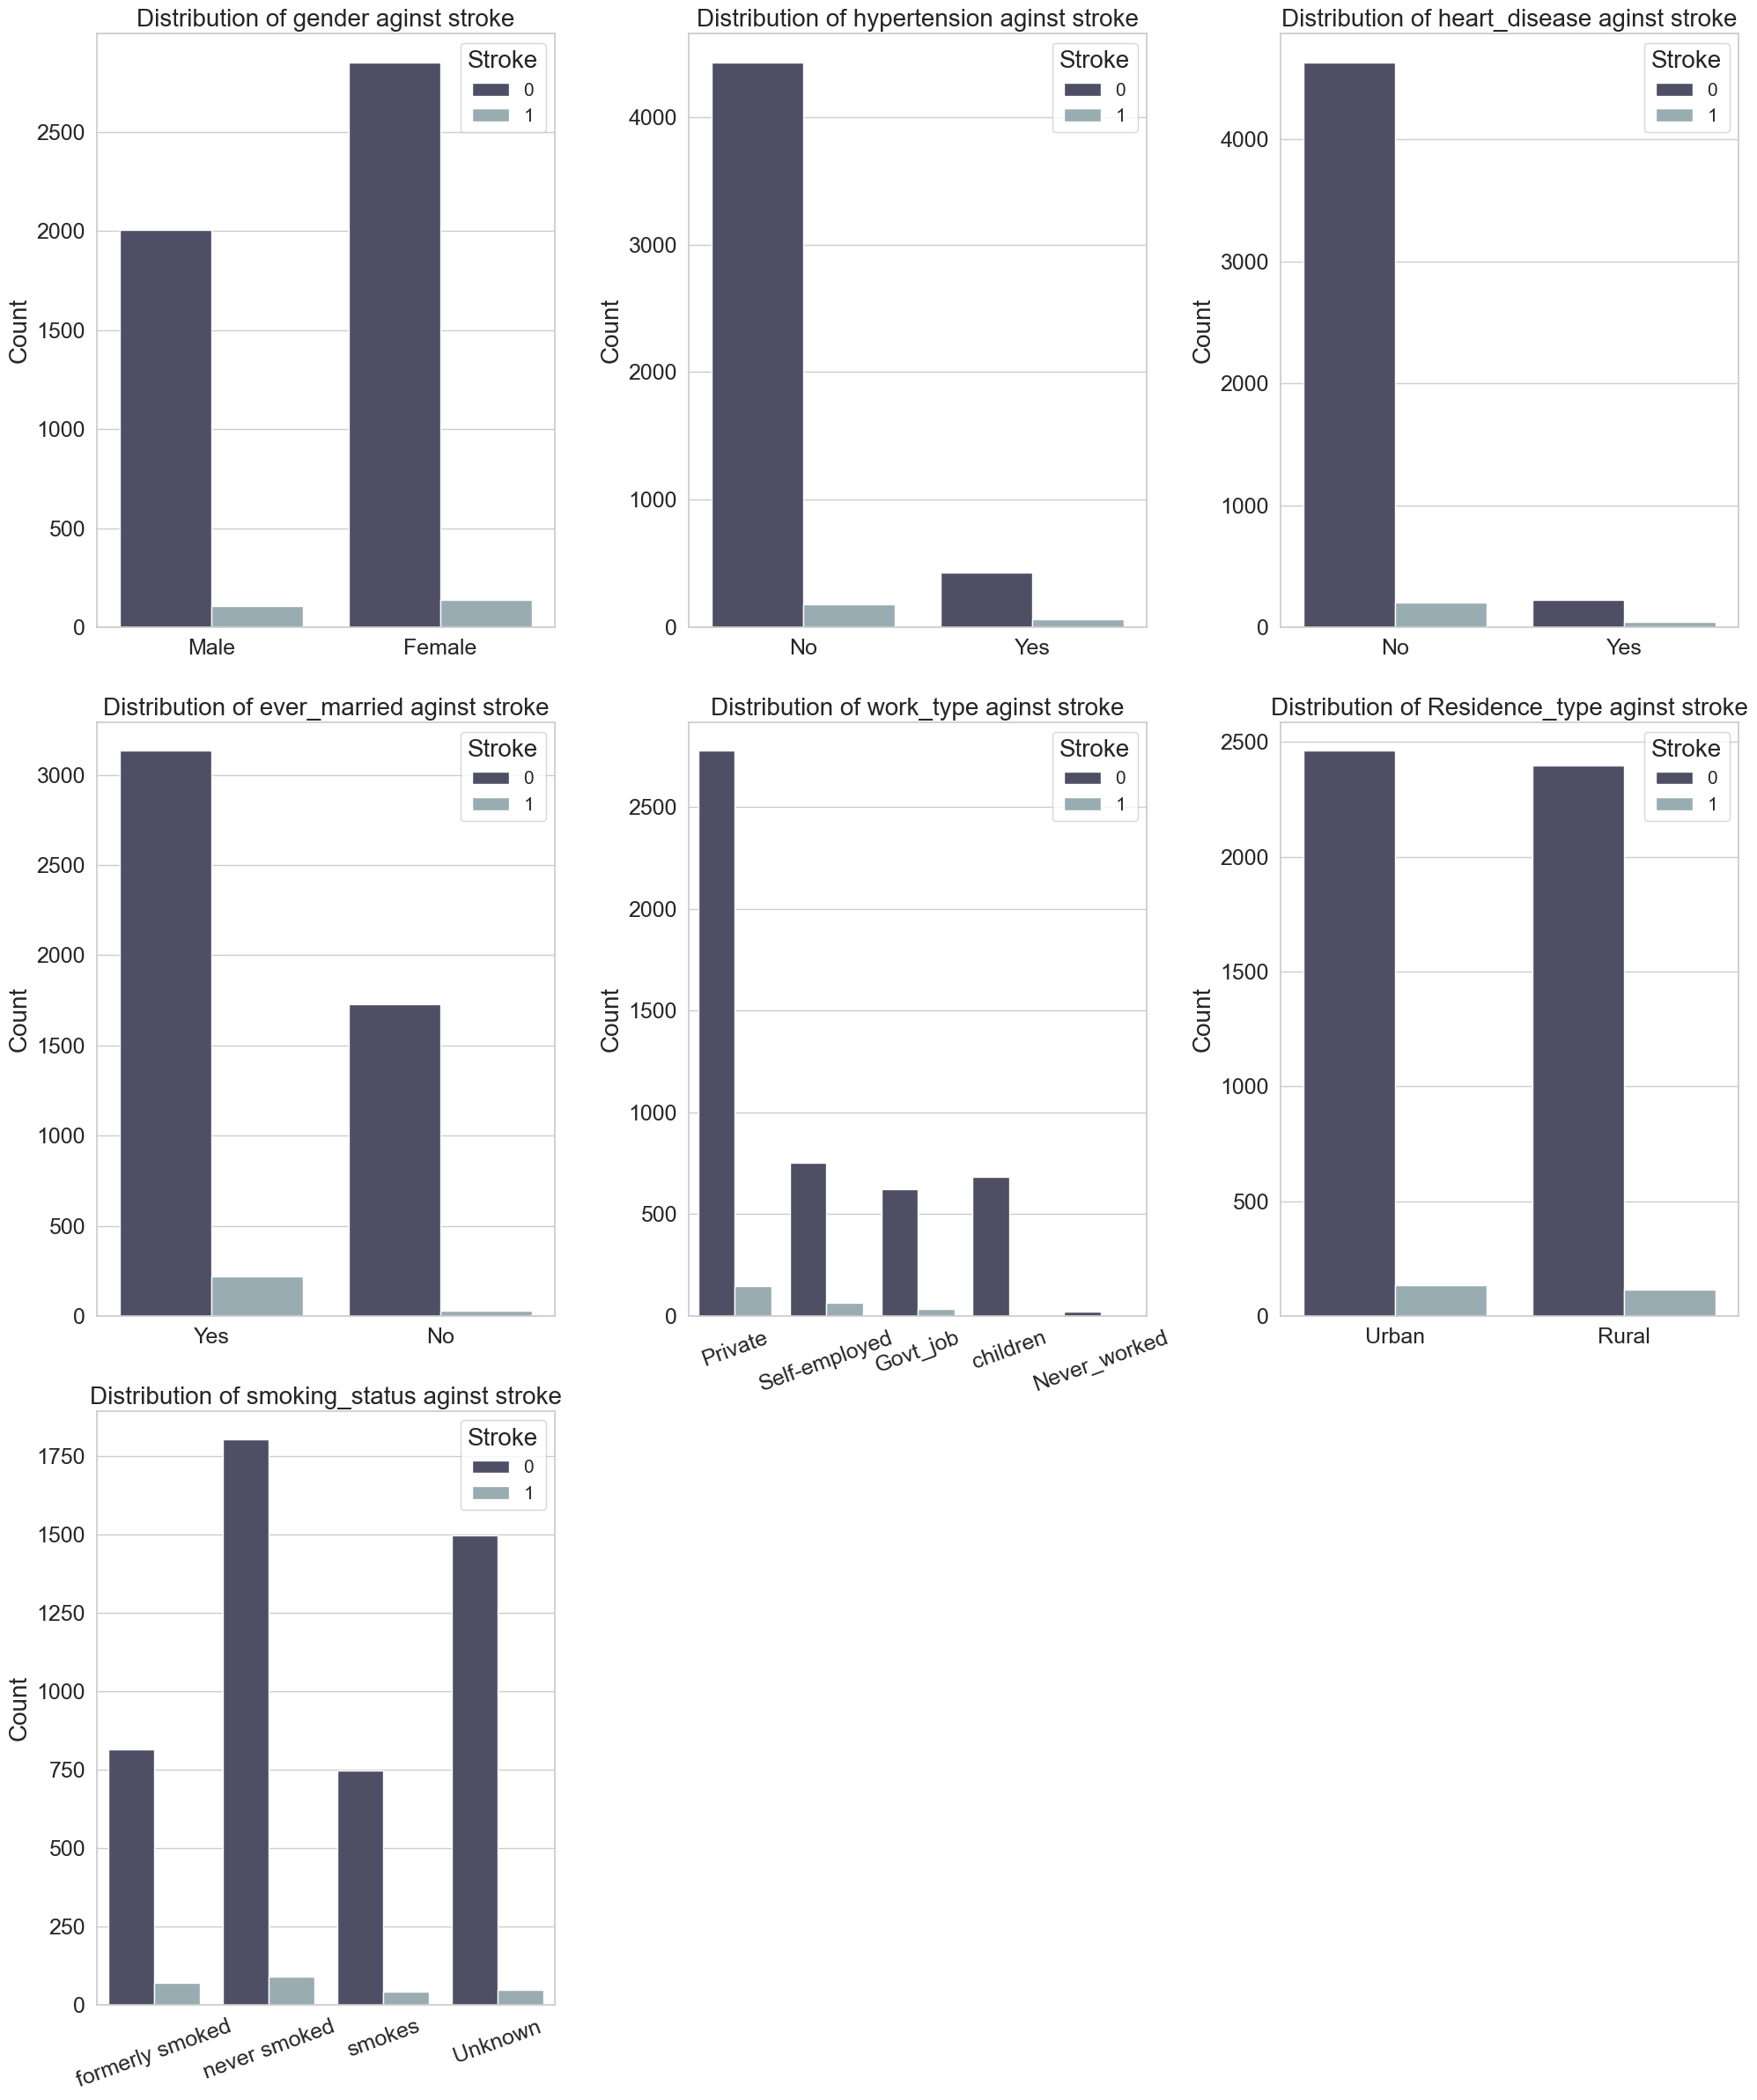

In [264]:
features = pd_format_2.drop(['age', 'avg_glucose_level', 'bmi', 'stroke'], axis=1).columns

fig, axes = mpl.subplots(3, 3, figsize=(20, 24))

axes = axes.flatten()

for i, feature in enumerate(features):
    count_plot = se.countplot(x=feature, data=pd_format_2, ax=axes[i], hue=pd_format_2['stroke'], palette='bone')

    if feature in ['work_type', 'smoking_status']:
        count_plot.set_xticks(range(len(pd_format_2[feature].unique())))
        count_plot.set_xticklabels(axes[i].get_xticklabels(), rotation=20)
    elif feature in ['hypertension', 'heart_disease']:
        count_plot.set(xticks=([0, 1]))
        count_plot.set(xticklabels = (['No', 'Yes']))

    count_plot.set_title(f"Distribution of {feature} aginst stroke", fontsize=20)
    count_plot.set_xlabel(None)
    count_plot.set_ylabel("Count", fontsize=20)
    count_plot.tick_params(axis='both', which='major', labelsize=18)
    count_plot.legend(title='Stroke', fontsize='15', title_fontsize='20')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

mpl.tight_layout()
mpl.show()
# fig.savefig(os.path.join(folder_path, "Data_against_stroke.png"))

## Histogram
Data will be presented in relation to population numbers.  
A histogram will be provided with a **density smooth histogram**.

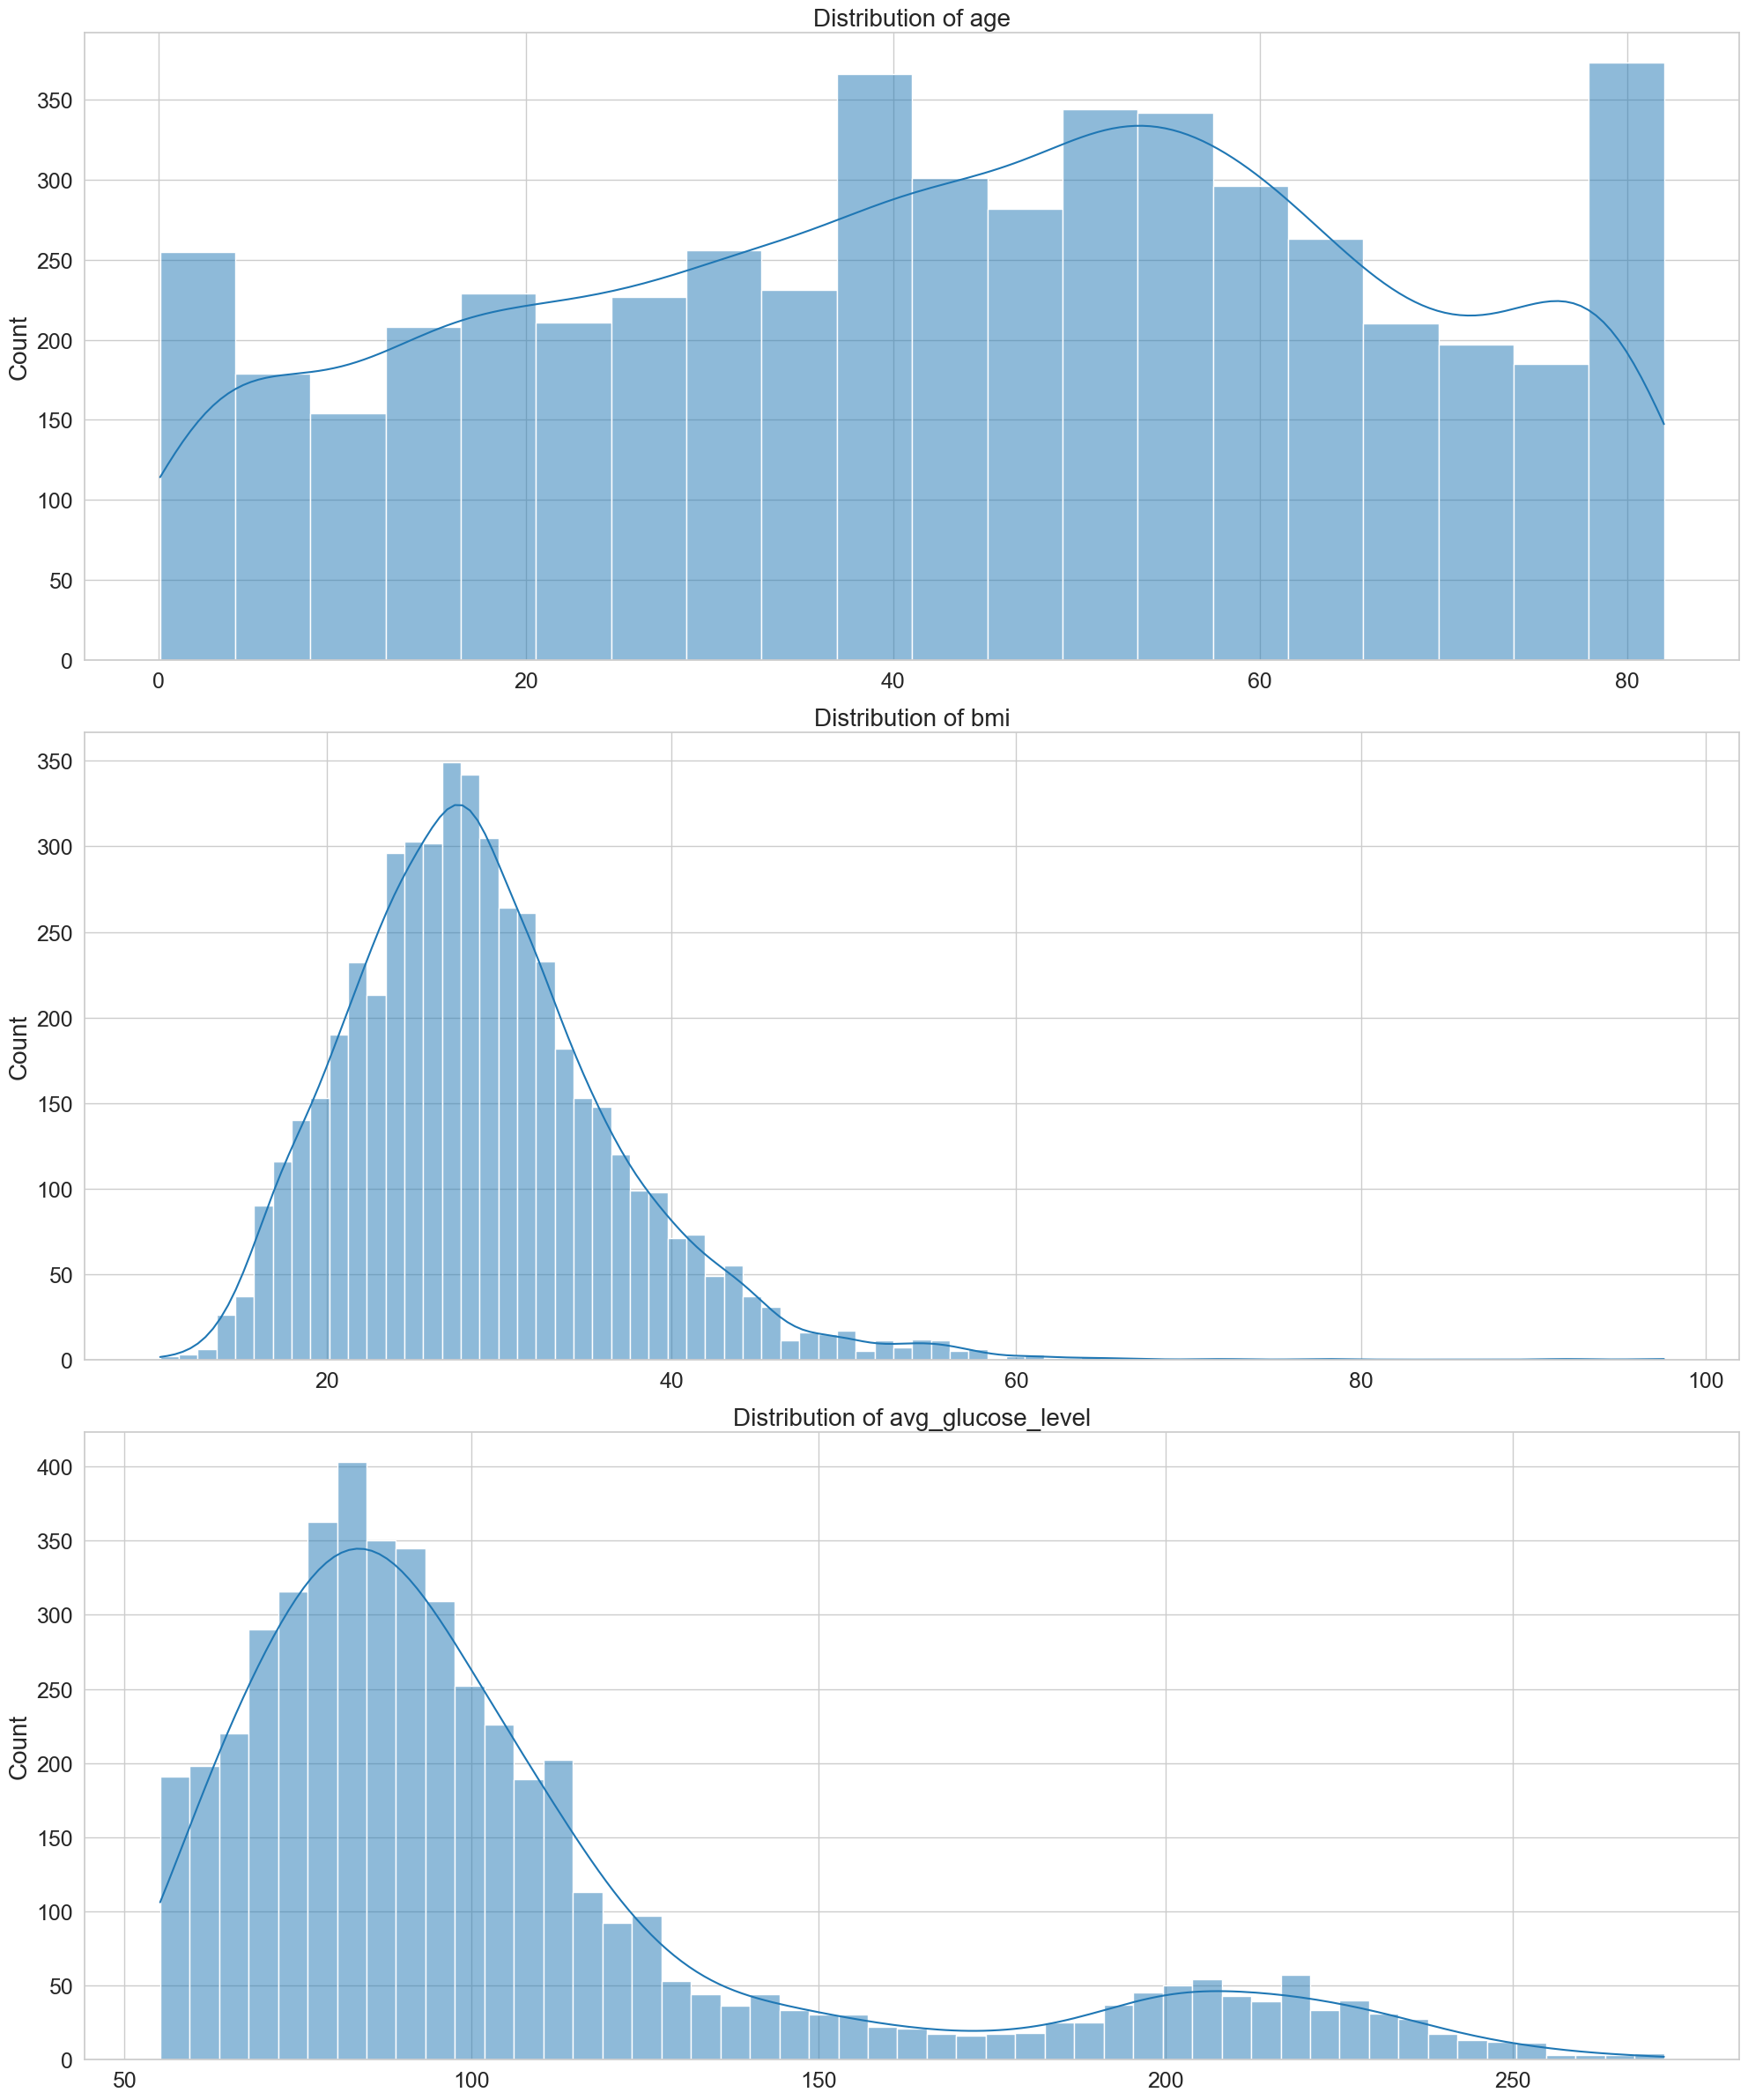

In [265]:
features = ['age', 'bmi', 'avg_glucose_level']

fig, axes = mpl.subplots(3, 1, figsize=(20, 24))

axes = axes.flatten()

for i, feature in enumerate(features):
    hist = se.histplot(x=feature, data=pd_format_2, ax=axes[i], kde = True)

    hist.set_title(f"Distribution of {feature}", fontsize=20)
    hist.set_xlabel(None)
    hist.set_ylabel("Count", fontsize=20)
    hist.tick_params(axis='both', which='major', labelsize=18)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

mpl.tight_layout()
mpl.show()

# fig.savefig(os.path.join(folder_path, "Histogram_smooth.png"))

### Age against stroke

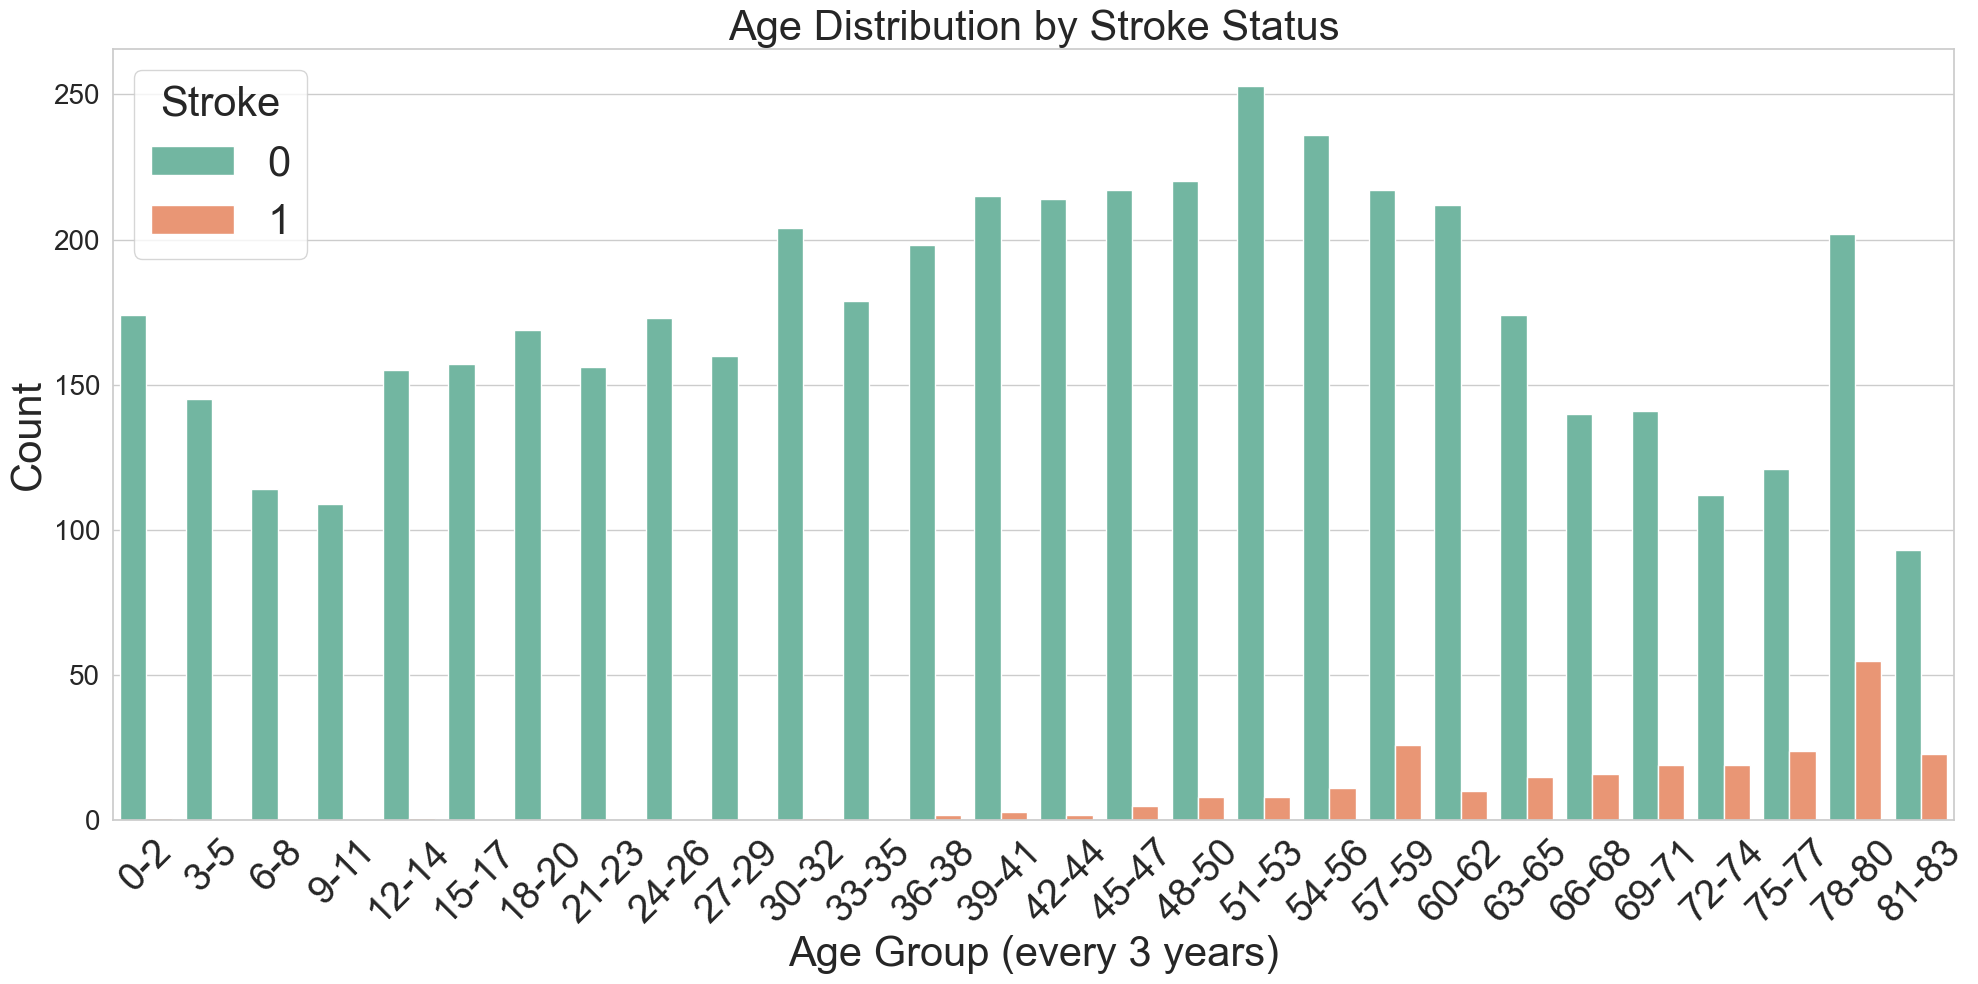

In [266]:
# Bin the age into intervals of 3 years
bins = range(0, int(pd_format_2['age'].max()) + 3, 3)
labels = [f'{i}-{i+2}' for i in bins[:-1]]
pd_format_2['age_group'] = pd.cut(pd_format_2['age'], bins=bins, labels=labels, right=False)

# Set up the plot
fig = mpl.figure(figsize=(20, 10))
se.set_style('whitegrid')
se.set_context('notebook', rc={'xtick.labelsize': 28, 'ytick.labelsize': 20})

# Create the count plot
count_plot = se.countplot(x=pd_format_2['age_group'], hue=pd_format_2['stroke'], data=pd_format_2, palette="Set2")

# Set labels and title
count_plot.set_xlabel('Age Group (every 3 years)', fontsize=30)
count_plot.set_ylabel('Count', fontsize=30)
count_plot.set_title('Age Distribution by Stroke Status', fontsize=30)

count_plot.set_xticks(range(len(pd_format_2['age_group'].unique())))
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45)

count_plot.legend(title='Stroke', fontsize='30', title_fontsize='30')

mpl.tight_layout()
mpl.show()

pd_format_2 = pd_format_2.drop('age_group', axis=1)

# fig.savefig(os.path.join(folder_path, "Age_against_stroke.png"))

### Gender x data

### Scatter plot map

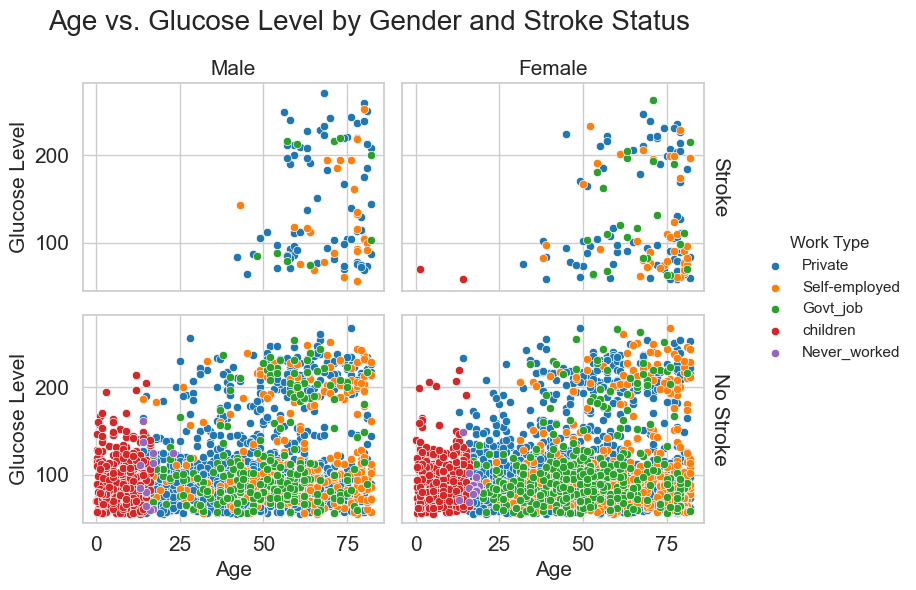

In [267]:
pd_format_2["stroke_label"] = pd_format_2["stroke"].apply(lambda x: "Stroke" if x == 1 else "No Stroke")

g = se.FacetGrid(pd_format_2, col="gender", row="stroke_label", hue="work_type", margin_titles=True, despine=False)
g.map_dataframe(se.scatterplot, x='age', y="avg_glucose_level")

g.add_legend(bbox_to_anchor=(1, 0.5), loc='center left', title='Work Type')
g.figure.subplots_adjust(wspace=0, hspace=0)

g.set_axis_labels("Age", "Glucose Level", fontsize=15)

for (row_val, col_val), ax in g.axes_dict.items():
    ax.set_facecolor((0, 0, 0, 0))

    ax.tick_params(axis='x', labelsize=15)  # Set x-axis tick label font size and rotation
    ax.tick_params(axis='y', labelsize=15)  # Set y-axis tick label font size

# Customize margin titles
g.set_titles(template='{col_name}', col_template="{col_name}", row_template="{row_name}", size=15)
g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
g.fig.suptitle('Age vs. Glucose Level by Gender and Stroke Status', fontsize=20)  # add a title to the entire plot

pd_format_2 = pd_format_2.drop("stroke_label", axis=1)

mpl.tight_layout()
mpl.show()

# g.figure.savefig(os.path.join(folder_path, "Scatter.png"))

# Model Selection and Training

In [295]:
import numpy as np

# Importing the splititng and accuracy score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Importing the models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

### General start

In [296]:
def plot_confusion_matrix(y_test, y_prediction, name):

    fig = mpl.figure(figsize=(6, 6))
    cm = confusion_matrix(y_test, y_prediction)
    ax = mpl.subplot()
    ax = se.heatmap(cm, annot=True, fmt='', cmap="Greens")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['No Stroke', 'Had Stroke'], fontsize=20)
    ax.yaxis.set_ticklabels(['No Stroke', 'Had Stroke'], fontsize=20)
    mpl.show()

    # fig.savefig(os.path.join(folder_path, f"{name}.png"))

In [297]:
def table_prediction(conf_matrix, Y_test, y_pred):

    # True Positive (TP): Cases where the model correctly predicts the positive class.
    # True Negative (TN): Cases where the model correctly predicts the negative class.
    # False Positive (FP): Cases where the model incorrectly predicts the positive class.
    # False Negative (FN): Cases where the model incorrectly predicts the negative class.
    
    TP = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    TN = conf_matrix[1][1]

    accuracy  = (TP + TN)/(TP + FN + TN + FN)
    precision = TP/(TP + FP)
    recall    = TP/(TP + FN)
    f1_score  = (2 * recall * precision) / (precision + recall)
    
    if (TN + FP) == 0:
        specificity = 0
    else:
        specificity = TN / (TN + FP)
      
    table_metrics = pd.DataFrame({'accuracy': [np.round(accuracy, 2)], 'precision':[np.round(precision, 2)], 
                                  'recall':[np.round(recall, 2)], 'f1_score':[np.round(f1_score, 2)],
                                 'specificity':[np.round(specificity, 2)]})

    display(table_metrics)
    
    return np.array([accuracy, precision, recall, f1_score, specificity])

In [298]:
# Updating the string values into binary.
# Example: at the gender we have male and female we change them into [0, 1]
le = LabelEncoder()
columns = ['gender', 'ever_married', 'work_type', 'smoking_status', 'Residence_type']

for i in range(len(columns)):
    pd_format_2[columns[i]] = le.fit_transform(pd_format_2[columns[i]])

# Transform the pandas dataFrames to numpy data
stroke_data = pd_format_2.to_numpy()
# stroke_data

In [299]:
# [: , :], prmia column este all the rows, doua este all the columns
X_data = stroke_data[:, :-1]
y_target_value = stroke_data[:, -1]

# Divide the stroke database into train/test where the train gets 70% and test 30%
X_train, X_test, Y_train, Y_test = train_test_split(X_data, y_target_value, test_size=0.3, random_state=42, stratify=y_target_value)

# List of results
results_model = np.empty((0, 9))

## Naive Bayes

### Gaussian

,accuracy,precision,recall,f1_score,specificity
0,0.94,0.88,0.97,0.92,0.15


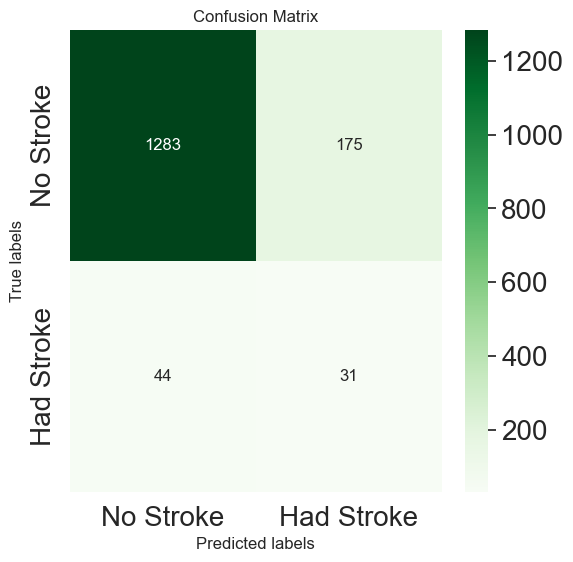

In [300]:
_X_train = X_train.copy()
_Y_train = Y_train.copy()
_X_test = X_test.copy()
_Y_test = Y_test.copy()

gaussian_classifier = GaussianNB()
gaussian_classifier.fit(_X_train, _Y_train)

y_pred = gaussian_classifier.predict(_X_test)

conf_matrix = confusion_matrix(_Y_test, y_pred)

arr = table_prediction(conf_matrix, Y_test, y_pred)

results_model = np.append(results_model, arr)

plot_confusion_matrix(Y_test,y_pred, "GaussianNB")


### Multinomial

,accuracy,precision,recall,f1_score,specificity
0,0.93,0.84,0.97,0.9,0.11


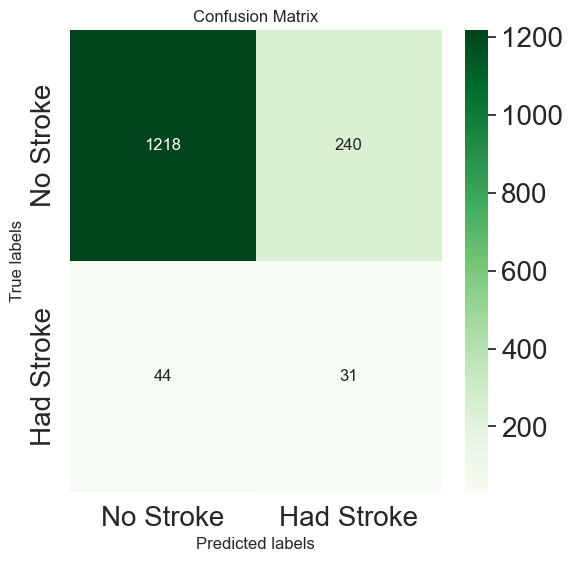

In [301]:
_X_train = X_train.copy()
_Y_train = Y_train.copy()
_X_test = X_test.copy()
_Y_test = Y_test.copy()

multinomial_classifier = MultinomialNB()
multinomial_classifier.fit(_X_train, _Y_train)

y_pred = multinomial_classifier.predict(_X_test)

conf_matrix = confusion_matrix(_Y_test, y_pred)

arr = table_prediction(conf_matrix, Y_test, y_pred)

results_model = np.append(results_model, arr)

plot_confusion_matrix(Y_test,y_pred, "MultinomialNB")

### Bernoulli

,accuracy,precision,recall,f1_score,specificity
0,0.91,1.0,0.95,0.97,0.2


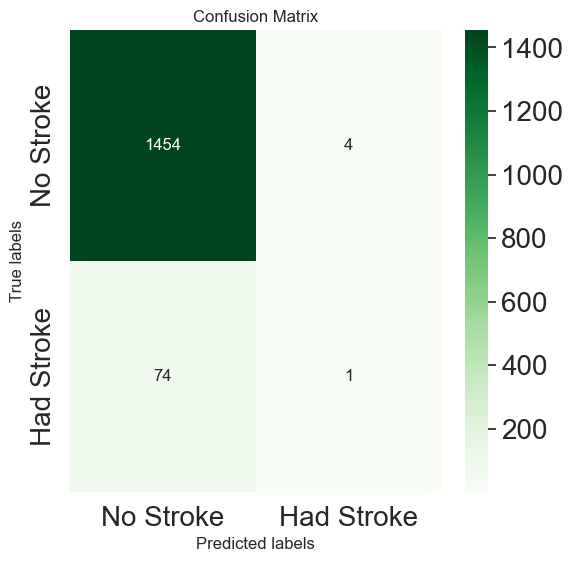

In [302]:
_X_train = X_train.copy()
_Y_train = Y_train.copy()
_X_test = X_test.copy()
_Y_test = Y_test.copy()

bernoulli_classifier = BernoulliNB()
bernoulli_classifier.fit(_X_train, _Y_train)

y_pred = bernoulli_classifier.predict(_X_test)

conf_matrix = confusion_matrix(_Y_test, y_pred)

arr = table_prediction(conf_matrix, Y_test, y_pred)

results_model = np.append(results_model, arr)

plot_confusion_matrix(Y_test,y_pred, "BernoulliNB")

### LogisticRegression

,accuracy,precision,recall,f1_score,specificity
0,0.91,1.0,0.95,0.98,0.67


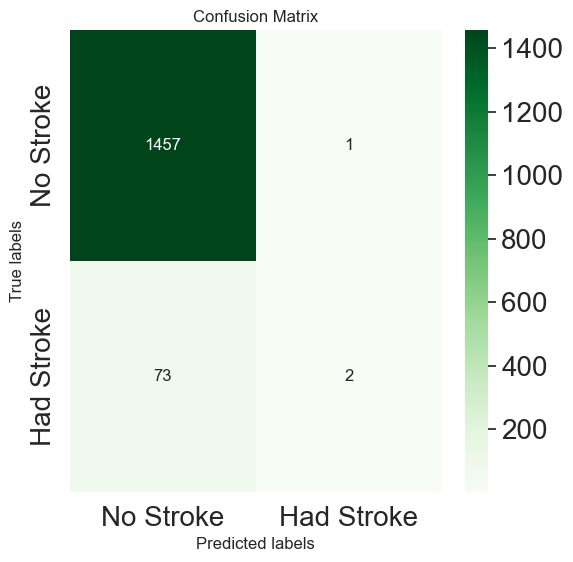

In [303]:
_X_train = X_train.copy()
_Y_train = Y_train.copy()
_X_test = X_test.copy()
_Y_test = Y_test.copy()

lr_classifier = LogisticRegression(max_iter=10000, solver='saga')
lr_classifier.fit(_X_train, _Y_train)

y_pred = lr_classifier.predict(_X_test)

conf_matrix = confusion_matrix(_Y_test, y_pred)

arr = table_prediction(conf_matrix, Y_test, y_pred)

results_model = np.append(results_model, arr)

plot_confusion_matrix(Y_test,y_pred, "Logistic_regression")

### Decision Tree Classifier

,accuracy,precision,recall,f1_score,specificity
0,0.92,0.95,0.96,0.95,0.16


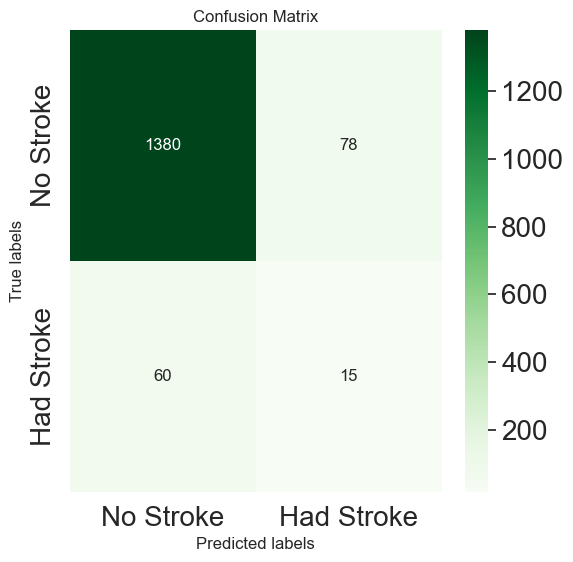

In [304]:
_X_train = X_train.copy()
_Y_train = Y_train.copy()
_X_test = X_test.copy()
_Y_test = Y_test.copy()

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(_X_train, _Y_train)

y_pred = dt_classifier.predict(_X_test)

conf_matrix = confusion_matrix(_Y_test, y_pred)

arr = table_prediction(conf_matrix, Y_test, y_pred)

results_model = np.append(results_model, arr)

plot_confusion_matrix(Y_test,y_pred, "DT_confusion")



### Random Forest Classification

,accuracy,precision,recall,f1_score,specificity
0,0.91,1.0,0.95,0.98,1.0


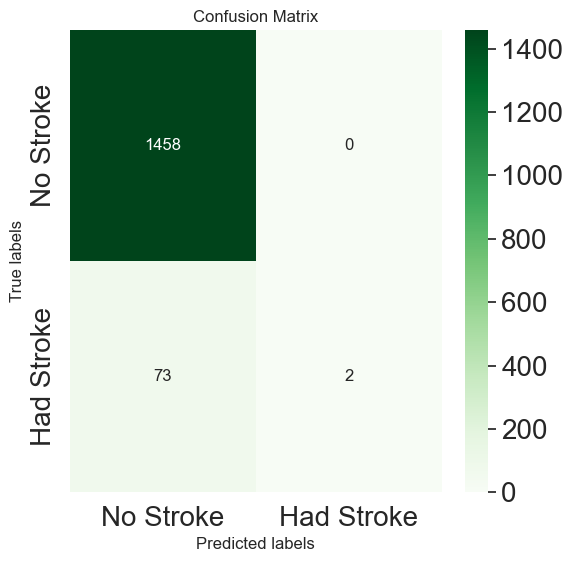

In [305]:
_X_train = X_train.copy()
_Y_train = Y_train.copy()
_X_test = X_test.copy()
_Y_test = Y_test.copy()

rf_classifier = RandomForestClassifier() # n_jobs=-1
rf_classifier.fit(_X_train, _Y_train)

y_pred = rf_classifier.predict(_X_test)

conf_matrix = confusion_matrix(_Y_test, y_pred)

arr = table_prediction(conf_matrix, Y_test, y_pred)

results_model = np.append(results_model, arr)

plot_confusion_matrix(Y_test,y_pred, "RF_confusion")

### Ridge Classification

,accuracy,precision,recall,f1_score,specificity
0,0.91,1.0,0.95,0.97,0


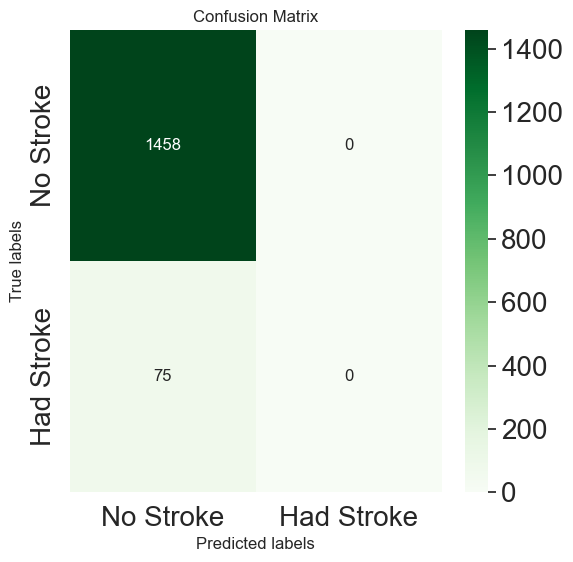

In [306]:
_X_train = X_train.copy()
_Y_train = Y_train.copy()
_X_test = X_test.copy()
_Y_test = Y_test.copy()

rc_classifier = RidgeClassifier(solver='saga', max_iter=10000)
rc_classifier.fit(_X_train, _Y_train)

y_pred = rc_classifier.predict(_X_test)

conf_matrix = confusion_matrix(_Y_test, y_pred)

arr = table_prediction(conf_matrix, Y_test, y_pred)

results_model = np.append(results_model, arr)

plot_confusion_matrix(Y_test,y_pred, "RC_confusion")

### KNeighbors Classification

,accuracy,precision,recall,f1_score,specificity
0,0.91,1.0,0.95,0.97,0.0


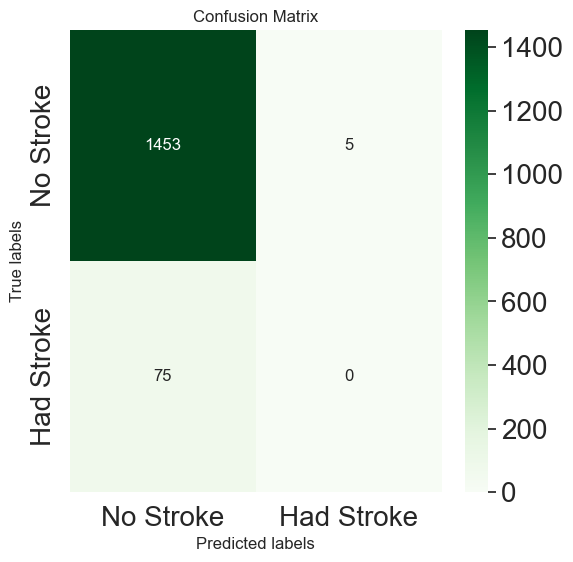

In [307]:
_X_train = X_train.copy()
_Y_train = Y_train.copy()
_X_test = X_test.copy()
_Y_test = Y_test.copy()

knn_classifier = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(_X_train, _Y_train)

y_pred = knn_classifier.predict(_X_test)

conf_matrix = confusion_matrix(_Y_test, y_pred)

arr = table_prediction(conf_matrix, Y_test, y_pred)

results_model = np.append(results_model, arr)

plot_confusion_matrix(Y_test,y_pred, "KNN_confusion")

### Supper Vector Machine

,accuracy,precision,recall,f1_score,specificity
0,0.91,1.0,0.95,0.97,0


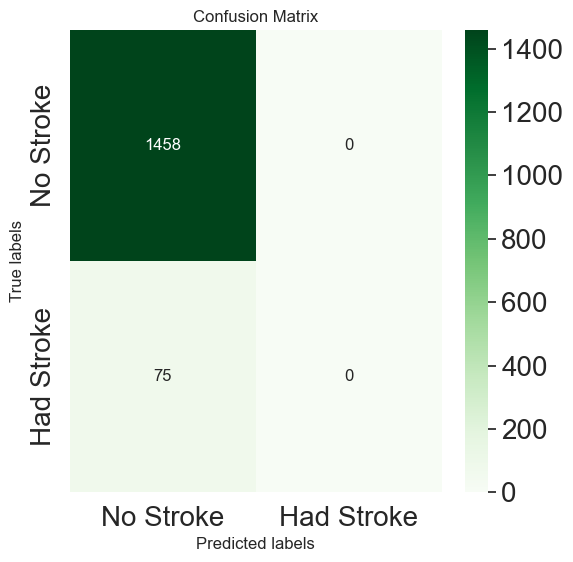

In [308]:
_X_train = X_train.copy()
_Y_train = Y_train.copy()
_X_test = X_test.copy()
_Y_test = Y_test.copy()

svc_classifier = SVC()
svc_classifier.fit(_X_train, _Y_train)

y_pred = svc_classifier.predict(_X_test)

conf_matrix = confusion_matrix(_Y_test, y_pred)

arr = table_prediction(conf_matrix, Y_test, y_pred)

results_model = np.append(results_model, arr)

plot_confusion_matrix(Y_test,y_pred, "SVC_confusion")

In [309]:
"""
Models:
Decision Tree : DT
Random Forest : RF
Ridge Classifier: RC
K-Nearest Neighbors : KNN
Support Vector Machine : SVM
Logistic Regression : LR
The variants of NaiveBayes (GaussianNB : GNB, MultinomialNB : MNB, and BernoulliNB : BNB)

Measurments:
accuracy
precision
recall
f1-score
"""

models = ['GNB', 'MNB', 'BNB', 'LR', 'DT', 'RN', 'RC', 'KNN', 'SVM']
acc = list()
pre = list()
rec = list()
f1_ = list()
spe = list()

for i in range(0, len(results_model), 5):
  acc.append(np.round(results_model[i], 2))
  pre.append(np.round(results_model[i+1], 2))
  rec.append(np.round(results_model[i+2], 2))
  f1_.append(np.round(results_model[i+3], 2))
  spe.append(np.round(results_model[i+4], 2))


dp_final = pd.DataFrame({'Mdoel': models, 'Accuracy': acc, 'Precision':pre, 'Recall':rec, 'F1-Score':f1_, 'Specifity':spe})

dp_final



,Mdoel,Accuracy,Precision,Recall,F1-Score,Specifity
0,GNB,0.94,0.88,0.97,0.92,0.15
1,MNB,0.93,0.84,0.97,0.90,0.11
2,BNB,0.91,1.00,0.95,0.97,0.20
3,LR,0.91,1.00,0.95,0.98,0.67
4,DT,0.92,0.95,0.96,0.95,0.16
5,RN,0.91,1.00,0.95,0.98,1.00
6,RC,0.91,1.00,0.95,0.97,0.00
7,KNN,0.91,1.00,0.95,0.97,0.00
8,SVM,0.91,1.00,0.95,0.97,0.00
